# Classificação de Clientes:

Irei classificar os clientes de acordo com ***RFM (recency, frequency and monetary)*** para que a empresa consiga encontrar 'bons' clientes de forma mais eficiente.

# Carregando Dataset:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_excel("../data/online_retail_cleaned.xlsx")

In [3]:
df.head()

,invoice_no,stock_code_cleaned,description_cleaned,quantity_cleaned,invoice_date,unit_price_cleaned,customer_id,country_cleaned
0,536620,21058,party invites woodland,12,2010-12-02 10:27:00,0.85,14135,united kingdom
1,536620,21060,party invites balloon girl,12,2010-12-02 10:27:00,0.85,14135,united kingdom
2,536620,21061,party invites football,12,2010-12-02 10:27:00,0.85,14135,united kingdom
3,536620,21062,party invites spaceman,12,2010-12-02 10:27:00,0.85,14135,united kingdom
4,536620,21719,lovely bonbon sticker sheet,12,2010-12-02 10:27:00,0.85,14135,united kingdom


In [4]:
df.describe()

,invoice_no,stock_code_cleaned,quantity_cleaned,invoice_date,unit_price_cleaned,customer_id
count,396337.000000,396337.000000,396337.000000,396337,396337.000000,396337.000000
mean,560618.894506,30763.483813,13.012547,2011-07-11 00:04:38.980463872,2.868222,15301.689416
min,536365.000000,10002.000000,1.000000,2010-12-01 08:26:00,0.040000,12346.000000
25%,549235.000000,22027.000000,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,561893.000000,22666.000000,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,572092.000000,23271.000000,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,581587.000000,90214.000000,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,13106.373686,20606.664522,179.641245,NaN,4.264663,1709.961948


# Preparando os dados:

Irei separar os três dados necessários:

- Recência ***('recency')***: Dias desde a última compra.
- Frequência ***('frequency')***: Número de transações feitas pelo cliente.
- Receita ***('monetary')***: Gasto total do cliente.

In [5]:
# Converter para datatype apropriado
df["invoice_date"] = pd.to_datetime(df["invoice_date"])

In [6]:
# Encontrando última transação
max_date = max(df["invoice_date"])
max_date

Timestamp('2011-12-09 12:50:00')

In [7]:
# Definindo dias desde a última transação (recency)
df["recency"] = (max_date - df["invoice_date"]).dt.days
df.head()

,invoice_no,stock_code_cleaned,description_cleaned,quantity_cleaned,invoice_date,unit_price_cleaned,customer_id,country_cleaned,recency
0,536620,21058,party invites woodland,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372
1,536620,21060,party invites balloon girl,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372
2,536620,21061,party invites football,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372
3,536620,21062,party invites spaceman,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372
4,536620,21719,lovely bonbon sticker sheet,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372


In [8]:
# Criando receita (monetary)
df["monetary"] = df["unit_price_cleaned"] * df["quantity_cleaned"]
df.head()

,invoice_no,stock_code_cleaned,description_cleaned,quantity_cleaned,invoice_date,unit_price_cleaned,customer_id,country_cleaned,recency,monetary
0,536620,21058,party invites woodland,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372,10.2
1,536620,21060,party invites balloon girl,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372,10.2
2,536620,21061,party invites football,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372,10.2
3,536620,21062,party invites spaceman,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372,10.2
4,536620,21719,lovely bonbon sticker sheet,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372,10.2


In [26]:
RFM = (
    df.groupby("customer_id", as_index=False) # agrupa por cliente...
    .agg(
        recency=("recency","min"), # última transação
        frequency=("invoice_no", "count"), # número total de transações
        monetary=("monetary","sum") # valor total gasto
    )
)

RFM.head()

,customer_id,recency,frequency,monetary
0,12346,325,1,77183.60
1,12347,1,182,4310.00
2,12348,74,27,1437.24
3,12349,18,72,1457.55
4,12350,309,16,294.40


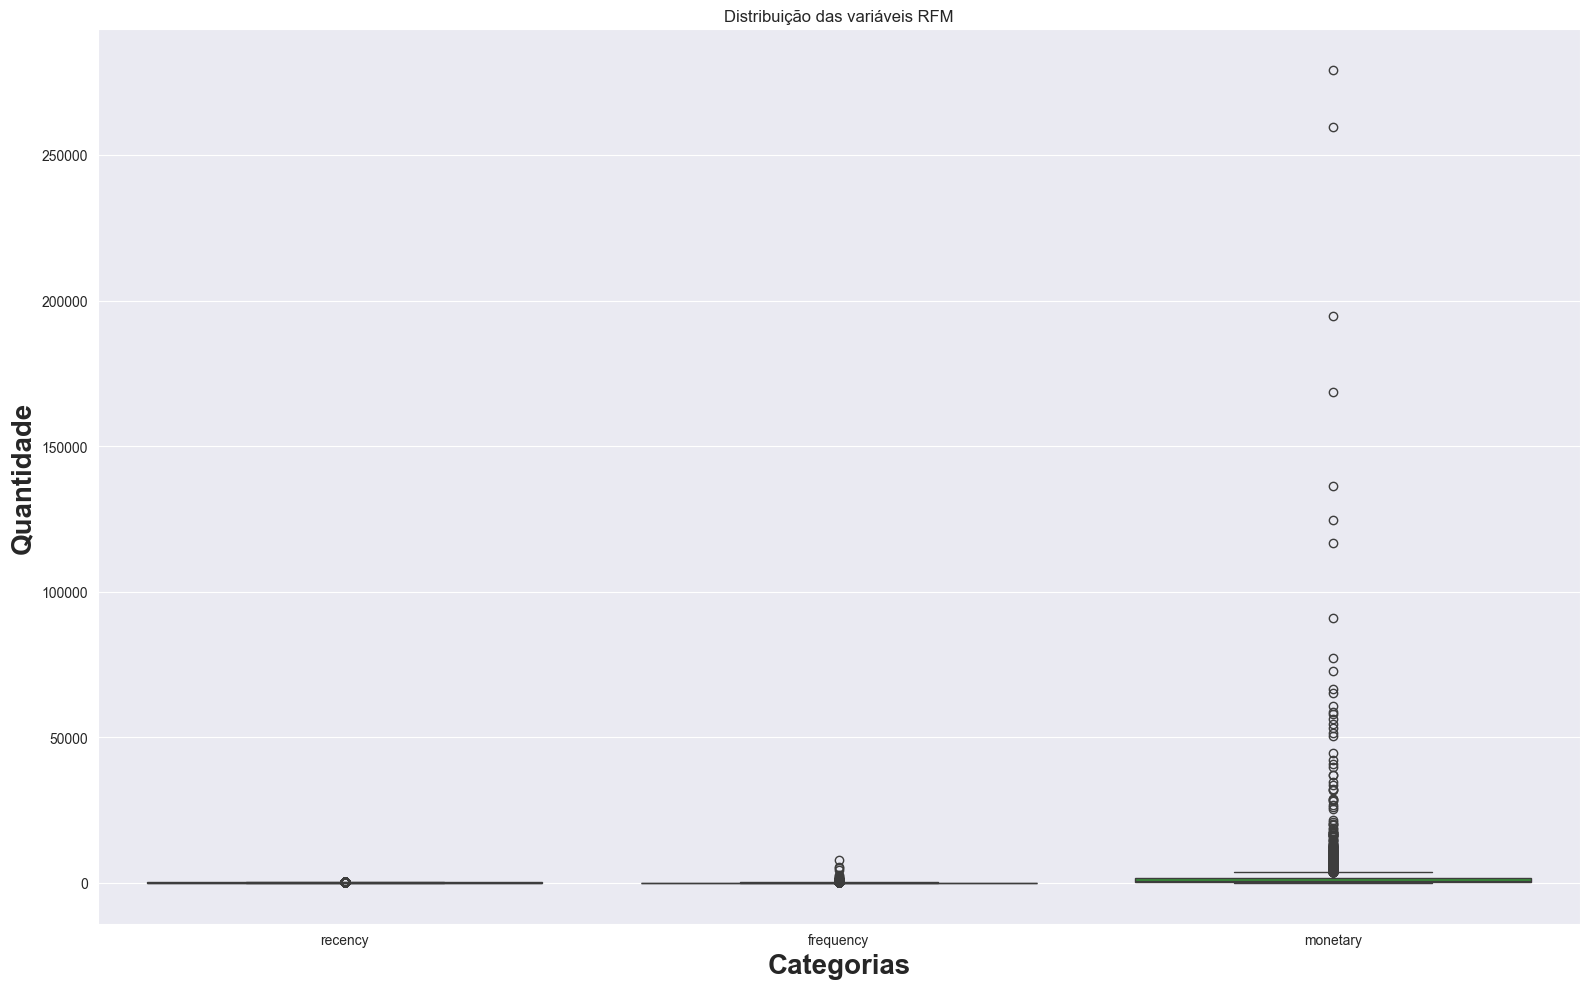

In [27]:
plt.figure(figsize=(16,10))
sns.boxplot(
    data=RFM[['recency','frequency','monetary']]
)
plt.title("Distribuição das variáveis RFM")
plt.ylabel("Quantidade",fontsize=20,fontweight='bold')
plt.xlabel("Categorias",fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

### Retirando Outliers:

Usarei apenas os valores centrais, retirando 10% dos valores extremos.

In [28]:
# Usa 90% dos valores centrais
RFM = RFM[RFM.monetary.between(RFM.monetary.quantile(0.5), RFM.monetary.quantile(0.95))]

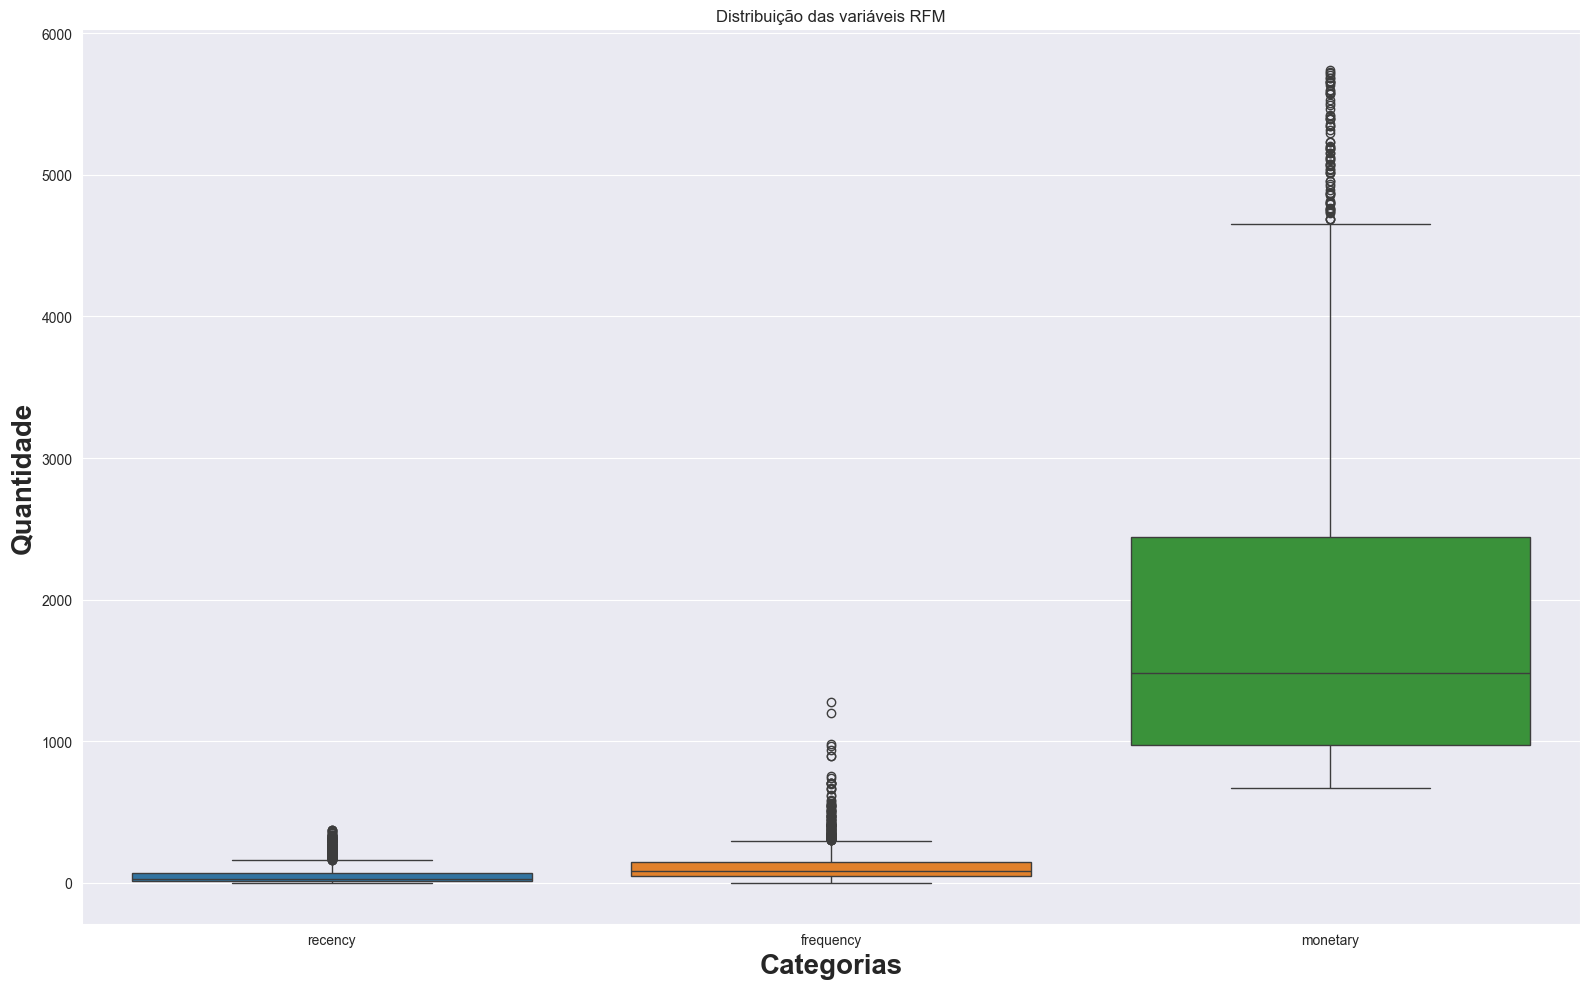

In [29]:
plt.figure(figsize=(16,10))
sns.boxplot(
    data=RFM[['recency','frequency','monetary']]
)
plt.title("Distribuição das variáveis RFM")
plt.ylabel("Quantidade",fontsize=20,fontweight='bold')
plt.xlabel("Categorias",fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

### Padronizando Valores:

Usarei padronização por escalonamento para alterar os valores, viabilizando o uso da clusterização por KMeans. Essa padronização se dá pela seguinte forma:

$x' = \dfrac{x - \mu}{\sigma}$

- $x'$ -> valor padronizado.
- $x$ -> valor original.
- $\mu$ -> valor médio.
- $\sigma$ -> desvio padrão.

In [30]:
# Padronizado os valores por escalonamento
standard = StandardScaler()
RFM_scaled = standard.fit_transform(RFM[['recency','frequency','monetary']])

In [31]:
RFM_scaled = pd.DataFrame(RFM_scaled)

RFM_scaled.columns = ['recency','frequency','monetary'] # renomeando colunas
RFM_scaled.head()

,recency,frequency,monetary
0,-0.798964,0.519573,2.076586
1,0.293148,-0.781308,-0.375545
2,-0.544636,-0.403632,-0.358209
3,-0.290309,-0.361669,-0.419505
4,2.641935,-0.521131,-0.680990


# Clusterização por K-Means:

O objetivo desta etapa é segmentar os clientes com base em seu comportamento de compra, utilizando as métricas RFM (Recency, Frequency, Monetary).

Primeiro, usando o método do cotovelo, irei escolher o número de clusters (k). O ponto onde a redução da inércia começa a desacelerar indica um valor adequado para o número de clusters.

In [32]:
elbow = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(RFM_scaled)
    elbow.append(kmeans.inertia_)

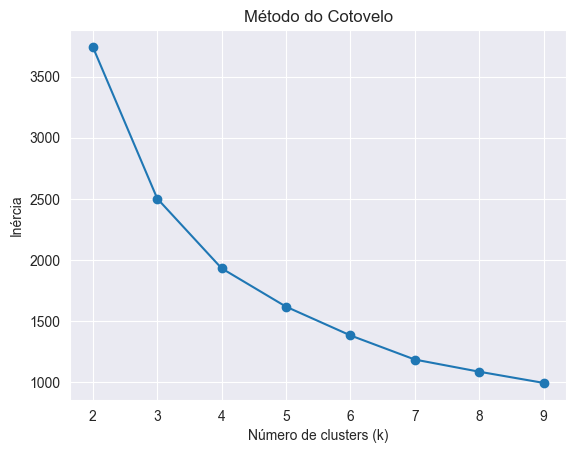

In [33]:
plt.plot(range(2, 10), elbow, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo")
plt.show()

A partir de 3 clusters, o valor da inércia começa a diminuir de forma mais suave. Então, k = 4 parece ser uma boa escolha.

In [34]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(RFM_scaled)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [35]:
RFM["clusters"] = kmeans.labels_
RFM.head()

,customer_id,recency,frequency,monetary,clusters
1,12347,1,182,4310.00,1
2,12348,74,27,1437.24,0
3,12349,18,72,1457.55,0
5,12352,35,77,1385.74,0
7,12354,231,58,1079.40,2


# Visualização por Cluster:

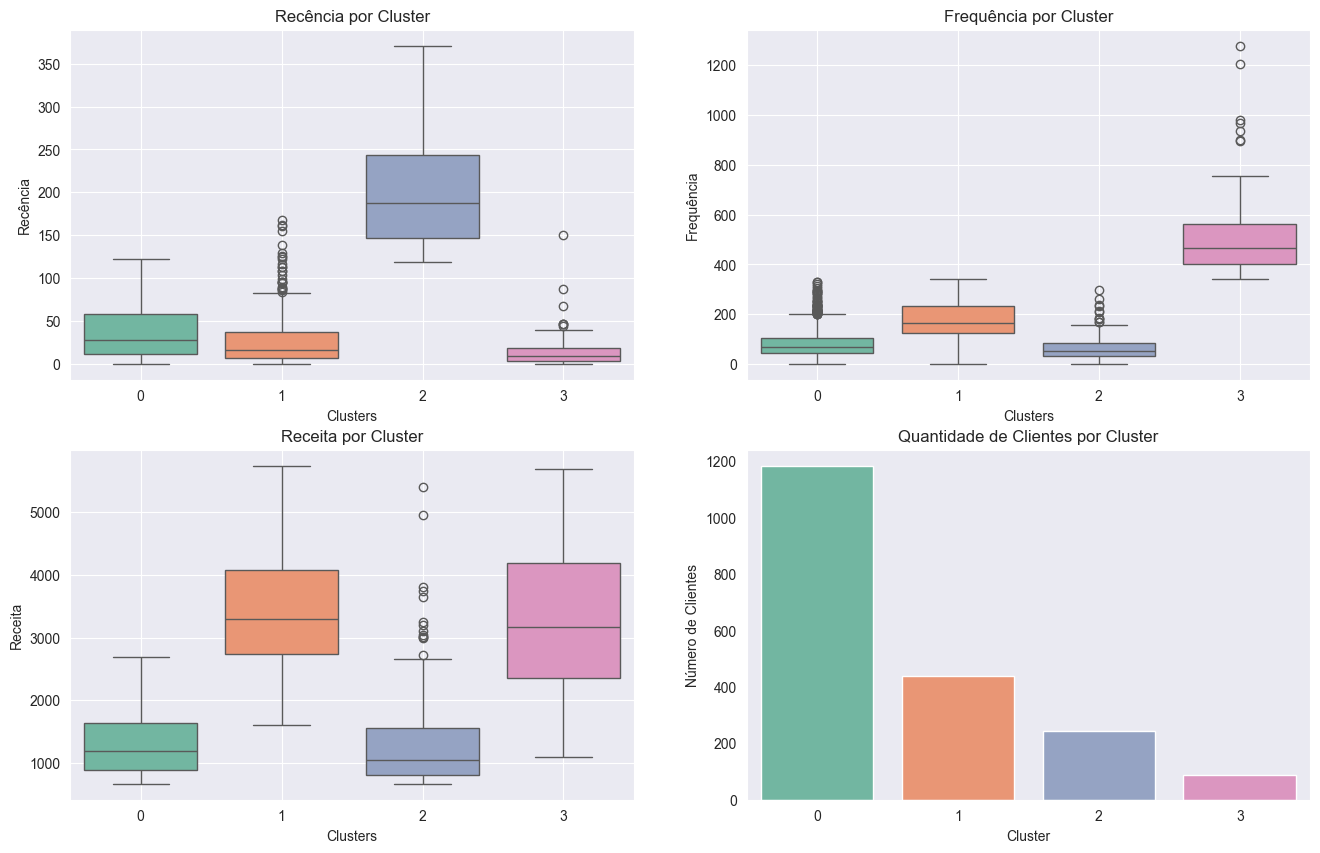

<Figure size 640x480 with 0 Axes>

In [36]:
fig, axes = plt.subplots(2,2, figsize=(16, 10))
axes = axes.flatten()  # transforma em lista 1D

feature = {"recency":"Recência","frequency":"Frequência","monetary":"Receita"}

for ax, (y, y_) in zip(axes, feature.items()):

    sns.boxplot(
        x='clusters',
        y=y,
        data=RFM,
        ax=ax,
        hue='clusters',
        legend=False,
        palette="Set2"
    )

    ax.set_title(f"{y_} por Cluster")
    ax.set_ylabel(y_)
    ax.set_xlabel("Clusters")
    ax.grid(True)

sns.countplot(
    data=RFM,
    x="clusters",
    hue="clusters",
    legend=False,
    palette="Set2"
)

plt.title("Quantidade de Clientes por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Número de Clientes")
plt.grid(axis="y")
plt.show()

plt.tight_layout()
plt.show()

# Discussão:

Farei uma breve síntese sobre cada cluster.

#### Cluster 0:
- Recência -> abaixo de 100 dias;
- Frequência -> abaixo de 200 compras por cliente;
- Receita -> abaixo de 2000 $ por cliente.

#### Cluster 1:
- Recência -> abaixo de 100 dias;
- Frequência -> abaixo de 400 compras por cliente;
- Receita -> acima de 2000 $ por cliente.

#### Cluster 2:
- Recência -> acima de 100 dias;
- Frequência -> abaixo de 200 compras por cliente;
- Receita -> abaixo de 2000 $ por cliente.

#### Cluster 3:
- Recência -> abaixo de 50 dias;
- Frequência -> acima de 300 compras por cliente;
- Receita -> acima de 2000 $ por cliente.

# Conclusão:

O grupo de clientes ideal seria aquele que faz compras regularmente ***(recência baixa)***, é um cliente 'fiel' ***(frequência alta)*** e já trouxe bastante receita ***(receita alta)***.

Analisando os clusters, percebemos que o Cluster 3, embora tenha poucos clientes, é um grupo ideal.

Porém, o Cluster 1 também possui alguns clientes 'bons'.

O cluster 0 representa clientes novos, com potecial de se tornarem 'bons'.

Já o cluster 2, indica clientes antigos, que já não possuem relevância.

***Concentrar promoções e anúncios diferenciados para o cluster 0 seria uma boa estratégia de vendas para atrair mais clientes fiéis.***